**Team 1**

**Code by Mengfai, Osinachi, Elli, Minshin, and Elnandia**

**Data:** bop_data_retrieved_by_ian

**Research question:** How does the pH of the surrounding water affect turbidity levels?

In [ ]:
%matplotlib notebook
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls '/content/drive/My Drive/Data'

 bopdata.csv  'BOP Project Data - Team 1.gsheet'


In [ ]:
bopdata = pd.read_csv('/content/drive/My Drive/Data/bopdata.csv')
bopdata

,pH_method,waterTemperature_results_1,rainedIn7Days,_id,pH_results_1,turbidity_results_2,dissolvedOxygen_units,weatherConditions,windSpeedMPH,dissolvedOxygen_results_2,waterTemperature_results_0,waterTemperature_results_2,turbidity_average,salinity_results_0,dissolvedOxygen,waterColor,turbidity_results_1,waterTemperature,expedition_id,waterTemperature_units,pH_results_0,airTemperatureC,waterTemperature_method,salinity_average,salinity_method,windDirection,salinity_results_2,dissolvedOxygen_results_1,salinity,rainedIn24Hours,pH_average,turbidity_units,pH_units,turbidity_method,waterGarbage,dissolvedOxygen_average,rainedIn72Hours,dissolvedOxygen_results_0,humidityPer,sizeOfLiveOysterMM,dissolvedOxygen_method,pH_results_2,waterTemperature_average,landGarbage,salinity_units,turbidity_results_0,salinity_results_1,oilSheen,turbidity
0,sensorRO,80.0,False,578fc14069723c560e30fca9,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,22.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
1,sensorRO,80.0,False,57902d4169723c560e30fe0c,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,41.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
2,sensorRO,80.0,False,57902d4169723c560e30fe0b,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,25.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
3,sensorRO,80.0,False,578fc14069723c560e30fca7,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,21.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
4,sensorRO,80.0,False,57902d4169723c560e30fe0a,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,23.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,testStrips,24.0,True,5805779c4885e2a854c8dcde,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,47.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1093,testStrips,24.0,True,580566f34885e2a854c8dc0f,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,46.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1094,testStrips,24.0,True,5805779c4885e2a854c8dcdd,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,46.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1095,testStrips,24.0,True,5805779c4885e2a854c8dcdc,6.0,43.0,mgl,pa

In [ ]:
bopdata.columns

Index(['pH_method', 'waterTemperature_results_1', 'rainedIn7Days', '_id',
       'pH_results_1', 'turbidity_results_2', 'dissolvedOxygen_units',
       'weatherConditions', 'windSpeedMPH', 'dissolvedOxygen_results_2',
       'waterTemperature_results_0', 'waterTemperature_results_2',
       'turbidity_average', 'salinity_results_0', 'dissolvedOxygen',
       'waterColor', 'turbidity_results_1', 'waterTemperature',
       'expedition_id', 'waterTemperature_units', 'pH_results_0',
       'airTemperatureC', 'waterTemperature_method', 'salinity_average',
       'salinity_method', 'windDirection', 'salinity_results_2',
       'dissolvedOxygen_results_1', 'salinity', 'rainedIn24Hours',
       'pH_average', 'turbidity_units', 'pH_units', 'turbidity_method',
       'waterGarbage', 'dissolvedOxygen_average', 'rainedIn72Hours',
       'dissolvedOxygen_results_0', 'humidityPer', 'sizeOfLiveOysterMM',
       'dissolvedOxygen_method', 'pH_results_2', 'waterTemperature_average',
       'landGarbage'

**Question 1**

In [ ]:
bopdata_avg = bopdata[['pH_average','turbidity_average']]
bopdata_avg1 = bopdata_avg.drop(bopdata_avg[bopdata_avg['pH_average'].isnull()].index) 
bopdata_avg2 = bopdata_avg.drop(bopdata_avg[bopdata_avg['turbidity_average'].isnull()].index)
bopdata_avg3 = bopdata_avg2.drop(bopdata_avg2[bopdata_avg2['pH_average']>14].index) 
bopdata_avg3

,pH_average,turbidity_average
0,7.833333,64.80
1,7.833333,64.80
2,7.833333,64.80
3,7.833333,64.80
4,7.833333,64.80
...,...,...
1092,6.000000,47.67
1093,6.000000,47.67
1094,6.000000,47.67
1095,6.000000,47.67


In [ ]:
bopdata_avg4 = bopdata_avg1.drop(bopdata_avg1[bopdata_avg1['pH_average']>7].index) 
bopdata_avg4

,pH_average,turbidity_average
95,6.17,51.07
96,6.17,51.07
97,6.17,51.07
98,6.17,51.07
99,6.17,51.07
...,...,...
1092,6.00,47.67
1093,6.00,47.67
1094,6.00,47.67
1095,6.00,47.67


In [ ]:
bopdata_avg5 = bopdata_avg.drop(bopdata_avg[bopdata_avg['pH_average'].isnull()].index)
bopdata_avg6 = bopdata_avg.drop(bopdata_avg[bopdata_avg['turbidity_average'].isnull()].index)
bopdata_avg7 = bopdata_avg6.drop(bopdata_avg6[bopdata_avg6['pH_average']<7].index)
bopdata_avg8 = bopdata_avg7.drop(bopdata_avg7[bopdata_avg7['pH_average']>14].index) 
(bopdata_avg8)

,pH_average,turbidity_average
0,7.833333,64.8
1,7.833333,64.8
2,7.833333,64.8
3,7.833333,64.8
4,7.833333,64.8
...,...,...
786,7.170000,80.0
787,7.170000,80.0
788,7.170000,80.0
789,7.170000,80.0


In [ ]:
bopdata_avg3.describe()

,pH_average,turbidity_average
count,739.000000,739.000000
mean,6.673009,58.760063
std,0.725694,22.830451
min,6.000000,21.330000
25%,6.000000,47.670000
50%,6.170000,63.833333
75%,7.430000,72.670000
max,7.966667,101.330000


In [ ]:
bopdata_avg3.plot.scatter(y ='turbidity_average', x = 'pH_average')

<IPython.core.display.Javascript object>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<IPython.core.display.Javascript object>

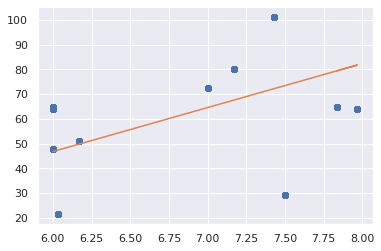

In [ ]:
#scatter plot with regression line
%matplotlib inline
x = np.array(bopdata_avg3['pH_average'])
y = np.array(bopdata_avg3['turbidity_average'])

plt.plot(x,y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b)

Later












**Question 2**

In [ ]:
# To answer our question 2: How does the water color change in response to the size of the oysters? <-- we should probably reword our question into How does the size of the oysters change in response to water color?
bopdata_avg9 = bopdata[['waterColor','sizeOfLiveOysterMM']].groupby('waterColor').mean()
print(bopdata_avg9)

            sizeOfLiveOysterMM
waterColor                    
darkBrown            24.716981
darkGreen            32.423077
lightBlue            29.164384
lightBrown           31.984064
lightGreen           40.119448


In [ ]:
bopdata_avg9.describe()

,sizeOfLiveOysterMM
count,5.000000
mean,31.681591
std,5.627629
min,24.716981
25%,29.164384
50%,31.984064
75%,32.423077
max,40.119448


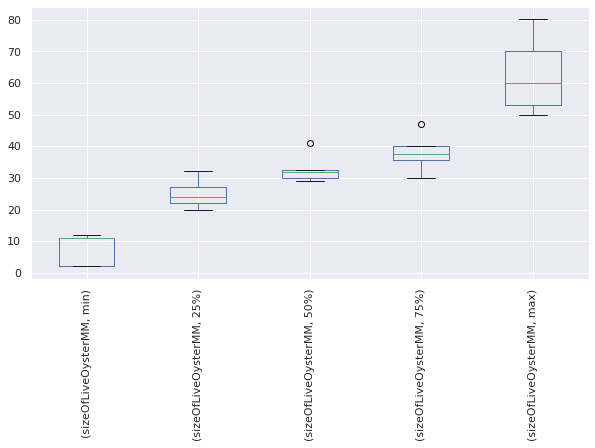

In [ ]:
%matplotlib inline
bopdata_avg10 = bopdata[['waterColor','sizeOfLiveOysterMM']].groupby('waterColor').describe()
bopdata_avg10.iloc[:,3:].plot(kind='box', rot = 90, figsize = (10,5))

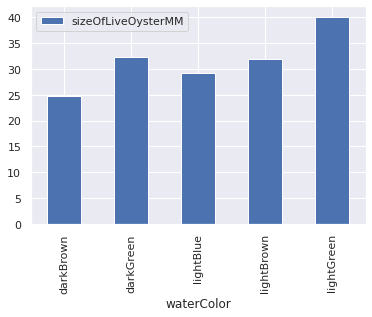

In [ ]:
%matplotlib inline
bopdata[['waterColor', 'sizeOfLiveOysterMM']].groupby('waterColor').mean().plot.bar()